In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM,Dense,Embedding
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [91]:
data = pd.read_csv("/content/vaccination_tweets.csv")
data.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [92]:
data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [93]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.518000e+03,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000
mean,1.341949e+18,6.342983e+04,1170.952740,13380.415012,1.715250,10.464654
std,2.768504e+15,4.762127e+05,2469.263253,41706.034152,12.237077,74.644921
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.339437e+18,1.140000e+02,165.000000,342.000000,0.000000,0.000000
50%,1.341481e+18,6.060000e+02,441.000000,1659.000000,0.000000,1.000000
75%,1.344353e+18,2.978000e+03,1191.000000,9733.750000,1.000000,4.000000
max,1.347131e+18,1.371493e+07,64441.000000,924667.000000,446.000000,2129.000000


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2518 non-null   int64 
 1   user_name         2518 non-null   object
 2   user_location     1998 non-null   object
 3   user_description  2394 non-null   object
 4   user_created      2518 non-null   object
 5   user_followers    2518 non-null   int64 
 6   user_friends      2518 non-null   int64 
 7   user_favourites   2518 non-null   int64 
 8   user_verified     2518 non-null   bool  
 9   date              2518 non-null   object
 10  text              2518 non-null   object
 11  hashtags          1884 non-null   object
 12  source            2517 non-null   object
 13  retweets          2518 non-null   int64 
 14  favorites         2518 non-null   int64 
 15  is_retweet        2518 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 280.4+ KB


In [95]:
data.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [96]:
columns = []
for i in data.columns:
  columns.append(i)
columns

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

In [97]:
data.isnull().any()

id                  False
user_name           False
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags             True
source               True
retweets            False
favorites           False
is_retweet          False
dtype: bool

In [98]:
data.isnull().sum()

id                    0
user_name             0
user_location       520
user_description    124
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            634
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64

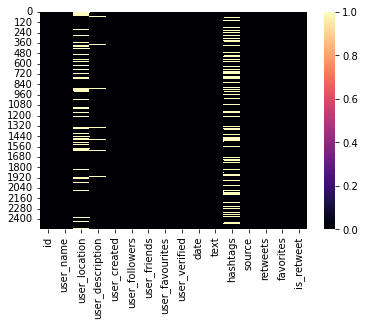

In [99]:
sns.heatmap(data.isnull(),cmap='magma')

In [100]:
data.shape

(2518, 16)

In [101]:
null_value_columns = []
for i in data.columns:
  if data[i].isnull().any() == True:
    null_value_columns.append(i)
null_value_columns

['user_location', 'user_description', 'hashtags', 'source']

In [102]:
np.where(data['user_location'].isnull())

(array([   4,    7,    8,   11,   13,   14,   20,   24,   36,   42,   46,
          47,   50,   61,   66,   70,   74,   97,   98,  106,  107,  108,
         112,  114,  121,  123,  132,  137,  141,  144,  148,  153,  158,
         161,  166,  167,  169,  170,  193,  194,  195,  197,  209,  210,
         213,  219,  224,  228,  230,  236,  237,  241,  247,  268,  272,
         277,  279,  281,  287,  294,  296,  306,  312,  313,  320,  326,
         327,  328,  329,  333,  345,  354,  355,  359,  360,  365,  369,
         373,  375,  378,  379,  380,  381,  385,  386,  389,  392,  395,
         399,  401,  405,  406,  430,  440,  442,  443,  450,  452,  454,
         458,  484,  489,  494,  496,  499,  500,  504,  507,  508,  512,
         514,  547,  557,  564,  566,  567,  580,  581,  590,  591,  595,
         599,  605,  606,  609,  613,  624,  626,  627,  629,  630,  631,
         636,  642,  644,  645,  647,  649,  655,  672,  673,  683,  697,
         702,  703,  711,  719,  724, 

In [103]:
np.where(data['user_description'].isnull())

(array([  20,   46,   59,   78,   97,  121,  141,  144,  148,  153,  161,
         208,  213,  219,  230,  261,  309,  344,  373,  378,  379,  380,
         381,  383,  389,  398,  401,  405,  428,  465,  466,  498,  505,
         567,  591,  617,  636,  683,  694,  697,  751,  753,  790,  791,
         804,  813,  832,  833,  842,  849,  850,  863,  884,  893,  895,
        1039, 1041, 1089, 1127, 1138, 1162, 1167, 1170, 1176, 1177, 1195,
        1231, 1277, 1315, 1344, 1423, 1431, 1483, 1491, 1502, 1533, 1549,
        1609, 1611, 1621, 1623, 1626, 1678, 1693, 1695, 1713, 1716, 1770,
        1771, 1805, 1837, 1847, 1848, 1861, 1892, 1912, 1936, 1959, 1961,
        2036, 2044, 2076, 2080, 2090, 2094, 2095, 2110, 2142, 2165, 2199,
        2212, 2240, 2269, 2270, 2274, 2279, 2311, 2319, 2354, 2368, 2405,
        2415, 2453, 2472]),)

In [104]:
np.where(data['hashtags'].isnull())

(array([   1,    3,    5,   12,   14,   23,   31,   33,   39,   49,   52,
          56,   60,   66,   69,   71,   76,   77,   80,   81,   88,   99,
         105,  112,  113,  115,  123,  124,  126,  133,  134,  135,  139,
         151,  154,  161,  162,  166,  169,  177,  178,  186,  187,  189,
         202,  203,  208,  212,  213,  214,  215,  218,  221,  222,  223,
         231,  235,  236,  237,  243,  244,  249,  257,  262,  263,  264,
         269,  271,  275,  279,  280,  285,  286,  292,  294,  295,  296,
         304,  309,  313,  314,  315,  316,  317,  322,  324,  331,  334,
         337,  338,  339,  344,  347,  349,  350,  361,  370,  373,  375,
         377,  378,  379,  380,  381,  395,  401,  402,  404,  411,  415,
         419,  432,  440,  443,  448,  452,  455,  462,  468,  472,  476,
         486,  489,  496,  498,  504,  506,  508,  511,  514,  522,  525,
         526,  530,  531,  532,  533,  538,  540,  541,  542,  543,  544,
         547,  552,  555,  556,  557, 

In [105]:
np.where(data['source'].isnull())
data['source'][1839]

nan

In [106]:
null_value_columns

['user_location', 'user_description', 'hashtags', 'source']

In [107]:
data['user_location'] = data["user_location"].fillna("Location Unavialable")
data['user_description'] = data["user_description"].fillna("User Description Unavialable")
data['hashtags'] = data["hashtags"].fillna("Hashtag Unavialable")
data['source'] = data["source"].fillna("Source Unavialable")

In [108]:
data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [109]:
data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,Hashtag Unavialable,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [110]:
data.shape

(2518, 16)

In [111]:
for i in columns:
  print("number of unique values in",i,"is = ",len(np.unique(data[i])))

number of unique values in id is =  2518
number of unique values in user_name is =  1704
number of unique values in user_location is =  876
number of unique values in user_description is =  1614
number of unique values in user_created is =  1703
number of unique values in user_followers is =  1307
number of unique values in user_friends is =  1157
number of unique values in user_favourites is =  1616
number of unique values in user_verified is =  2
number of unique values in date is =  2516
number of unique values in text is =  2518
number of unique values in hashtags is =  1192
number of unique values in source is =  27
number of unique values in retweets is =  42
number of unique values in favorites is =  115
number of unique values in is_retweet is =  1


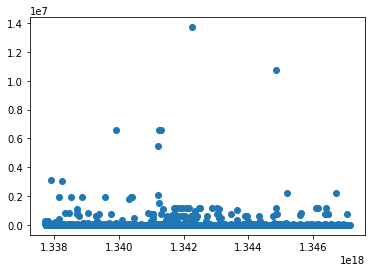

In [112]:
plt.scatter(data['id'],data['user_followers'])

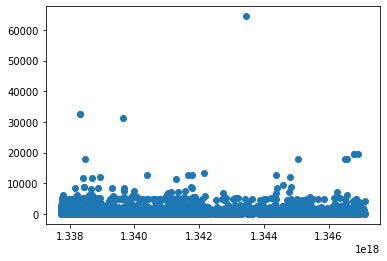

In [113]:
plt.scatter(data['id'],data['user_friends'])

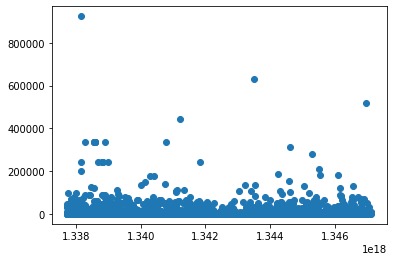

In [114]:
plt.scatter(data['id'],data['user_favourites'])

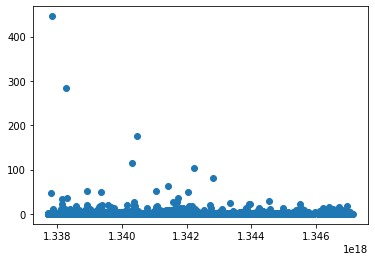

In [115]:
plt.scatter(data['id'],data['retweets'])

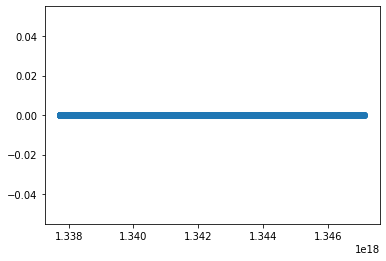

In [116]:
plt.scatter(data['id'],data['is_retweet'])

In [117]:
data.head(1)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False


In [118]:
data['user_name'] = LabelEncoder().fit_transform(data['user_name'])
data['user_location'] = LabelEncoder().fit_transform(data["user_location"])
data['user_description'] = LabelEncoder().fit_transform(data["user_description"])
data['hashtags'] = LabelEncoder().fit_transform(data["hashtags"])
data['source'] = LabelEncoder().fit_transform(data["source"])

In [119]:
data.drop('date',axis =1,inplace=True)

In [120]:
data.head(2)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,1139,386,140,2009-04-08 17:52:46,405,1692,3247,False,Same folks said daikon paste could treat a cyt...,754,23,0,0,False
1,1338158543359250433,63,647,867,2009-09-21 15:27:30,834,666,178,False,While the world has been on the wrong side of ...,0,22,1,1,False


In [121]:
data.drop('user_created',axis = 1,inplace=True)

In [122]:
data.head(2)

,id,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,1139,386,140,405,1692,3247,False,Same folks said daikon paste could treat a cyt...,754,23,0,0,False
1,1338158543359250433,63,647,867,834,666,178,False,While the world has been on the wrong side of ...,0,22,1,1,False


In [123]:
data['user_verified'].replace(False,0,inplace=True)
data['user_verified'].replace(True,1,inplace=True)
data['user_verified'] =data['user_verified'].astype(int)

In [124]:
data.drop('is_retweet',axis = 1,inplace=True)

In [125]:
data.head(2)

,id,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites
0,1340539111971516416,1139,386,140,405,1692,3247,0,Same folks said daikon paste could treat a cyt...,754,23,0,0
1,1338158543359250433,63,647,867,834,666,178,0,While the world has been on the wrong side of ...,0,22,1,1


In [126]:
data.drop('id',axis = 1,inplace=True)

In [127]:
data.head(1)

,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites
0,1139,386,140,405,1692,3247,0,Same folks said daikon paste could treat a cyt...,754,23,0,0


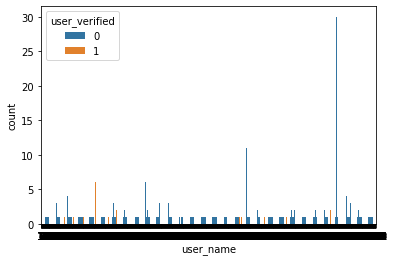

In [128]:
sns.countplot(x='user_name',hue='user_verified',data=data)

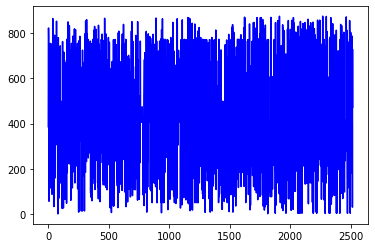

In [129]:
plt.plot(data["user_location"],color='b')
plt.show()

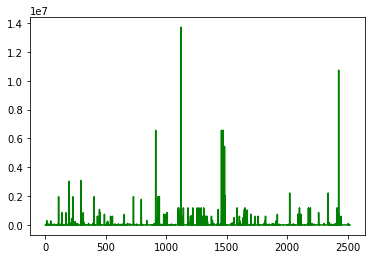

In [130]:
plt.plot(data['user_followers'],color='g')

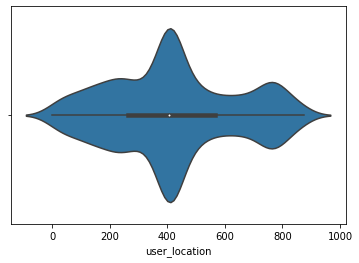

In [131]:
sns.violinplot(x='user_location',hue='user_verified',data=data)

In [132]:
take = []
drop = []
for j in data.columns:
  if j == 'text' or j == 'user_verified':
    take.append(j)
  else:
    drop.append(j)

In [133]:
drop

['user_name',
 'user_location',
 'user_description',
 'user_followers',
 'user_friends',
 'user_favourites',
 'hashtags',
 'source',
 'retweets',
 'favorites']

In [134]:
data.drop(drop,axis=1,inplace=True)

In [135]:
data.head()

,user_verified,text
0,0,Same folks said daikon paste could treat a cyt...
1,0,While the world has been on the wrong side of ...
2,0,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,1,"Facts are immutable, Senator, even when you're..."
4,0,Explain to me again why we need a vaccine @Bor...


In [136]:
x = data['text']
y = data['user_verified']

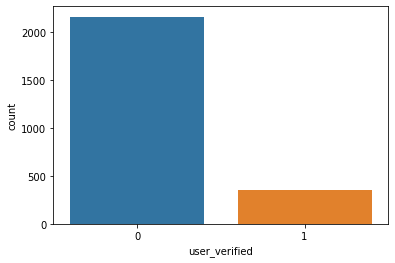

In [137]:
sns.countplot(x = 'user_verified',data=data)

In [138]:
verified_user = []
not_verified_user = []
for i in data['user_verified']:
  if i == 1:
    verified_user.append(i)
  else:
    not_verified_user.append(i)

In [139]:
print("percentage of verified user = ",((len(verified_user)/len(data['user_verified']))*100))

percentage of verified user =  14.138204924543288


In [140]:
print("percentage of not verified user = ",((len(not_verified_user)/len(data['user_verified']))*100))

percentage of not verified user =  85.86179507545671


In [141]:
tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(x)

In [142]:
sequence = tokenizer.texts_to_sequences(x)
final_input = pad_sequences(sequence,maxlen=200,padding='pre')

In [143]:
final_output = np.array(y)

In [144]:
model = Sequential()
model.add(
    Embedding(
        input_dim=10000,
        output_dim=120,
        input_length=200,
    ),)
model.add(
    Bidirectional(LSTM(64, return_sequences=True))
)

model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))


In [145]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 120)          1200000   
                                                                 
 bidirectional_8 (Bidirectio  (None, 200, 128)         94720     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 200, 128)          0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,336,001
Trainable params: 1,336,001
No

In [146]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [147]:
pred = model.fit(final_input,final_output,epochs=5,batch_size=128)

Epoch 1/5
20/20 [==============================] - 33s 1s/step - loss: 0.4908 - accuracy: 0.8229
Epoch 2/5
20/20 [==============================] - 25s 1s/step - loss: 0.4020 - accuracy: 0.8586
Epoch 3/5
20/20 [==============================] - 24s 1s/step - loss: 0.3618 - accuracy: 0.8586
Epoch 4/5
20/20 [==============================] - 26s 1s/step - loss: 0.1938 - accuracy: 0.9214
Epoch 5/5
20/20 [==============================] - 25s 1s/step - loss: 0.0442 - accuracy: 0.9893


In [148]:
model.save("vaccine delivery.h5")

In [153]:
print(pred.history['accuracy'])

[0.8228753209114075, 0.8586179614067078, 0.8586179614067078, 0.9213661551475525, 0.989277184009552]


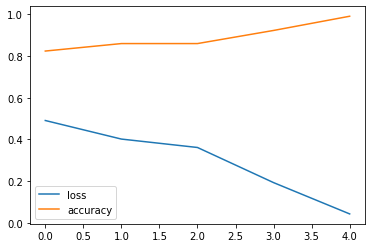

In [149]:
plt.plot(pred.history['loss'],label='loss')
plt.plot(pred.history['accuracy'],label='accuracy')
plt.legend(loc='best')
plt.show()

In [150]:
def verification(details):
  sentence_list = []
  sentence_list.append(details)
  fit = tokenizer.texts_to_sequences(sentence_list)
  sequence = pad_sequences(fit,maxlen=200,padding='pre')
  
  output = (model.predict(sequence) > 0.5).astype("int32")
  print(output)
  if output.all() == 1:
    print("Verified User")
  else:
    print("User is not verified")

In [151]:
verification("While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've evâ€¦ https://t.co/dlCHrZjkhm")

1/1 [==============================] - 2s 2s/step
[[0]]
User is not verified


In [152]:
verification("Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4")

1/1 [==============================] - 0s 49ms/step
[[1]]
Verified User
